**1.Import des librairies & des données**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage les graphiques dans le notebook
%matplotlib inline

**2. Chargement du dataset**

In [9]:
df_fr= pd.read_csv('C:/Users/josue/Downloads/city_temperature_france.csv')
df_fr.head()

,Region,Country,City,Month,Day,Year,date,AvgTemperature,AvgTemperature_C
0,Europe,France,Paris,1,1,1995,1995-1-1,37.4,3.000000
1,Europe,France,Paris,1,2,1995,1995-1-2,35.2,1.777778
2,Europe,France,Paris,1,3,1995,1995-1-3,36.0,2.222222
3,Europe,France,Paris,1,4,1995,1995-1-4,30.7,-0.722222
4,Europe,France,Paris,1,5,1995,1995-1-5,27.0,-2.777778


**3. Exploration des données (EDA)**


    Statistiques descriptives

In [10]:
df_fr.describe()
df_fr['City'].value_counts()

City
Paris       9266
Bordeaux    9266
Name: count, dtype: int64

**Visualisations**

    Distribution des températures

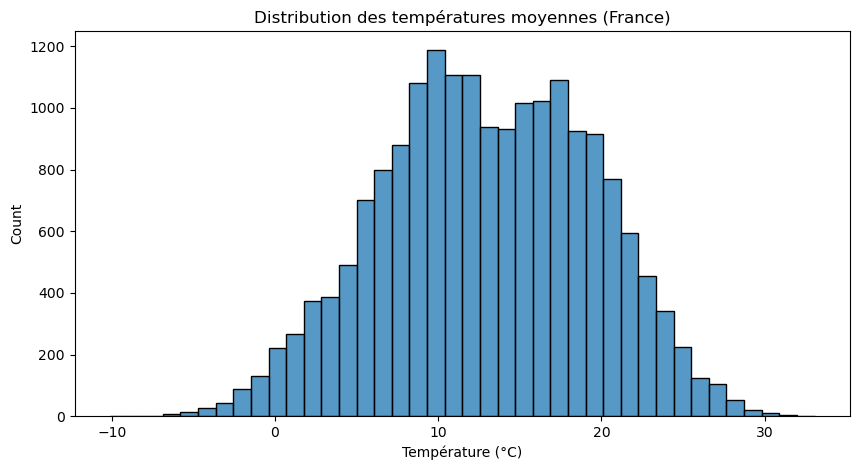

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df_fr['AvgTemperature_C'], bins=40)
plt.title('Distribution des températures moyennes (France)')
plt.xlabel('Température (°C)')
plt.show()

Évolution de la température par ville

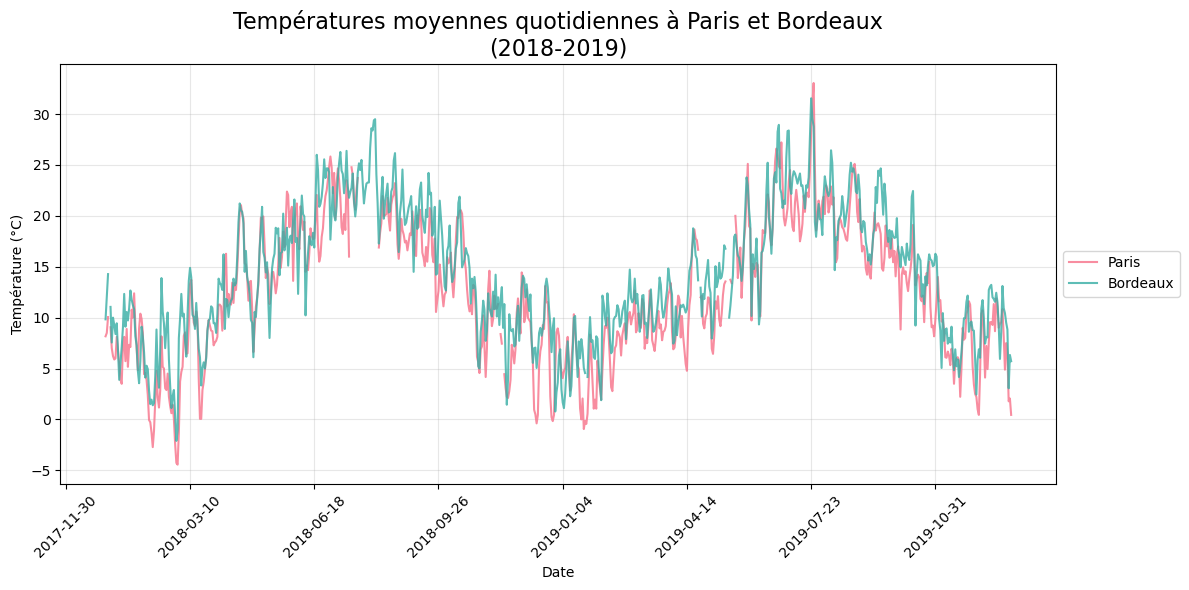

In [33]:
# Define cities to analyze
villes = ['Paris', 'Bordeaux']

# Create a mask to filter data for the years 2018-2019
mask = (df_fr['date'] >= '2018-01-01') & (df_fr['date'] <= '2019-12-31')
df_sample = df_fr[mask]

# Create a figure with specified size
plt.figure(figsize=(12,6))

# Generate a color palette with distinct colors for each city
palette = sns.color_palette("husl", len(villes))

# Loop through each city to plot its temperature data
for i, city in enumerate(villes):
    # Filter data for the current city
    data = df_sample[df_sample['City'] == city]
    
    # Plot temperature data for this city with its assigned color
    plt.plot(data['date'], data['AvgTemperature_C'], 
             label=city, color=palette[i], alpha=0.8)

# Set plot title and labels
plt.title("Températures moyennes quotidiennes à Paris et Bordeaux\n(2018-2019)", fontsize=16)
plt.xlabel('Date')
plt.ylabel('Température (°C)')

# Format the x-axis for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and display
plt.tight_layout()
plt.show()


    Graphiques interactifs avec Plotly

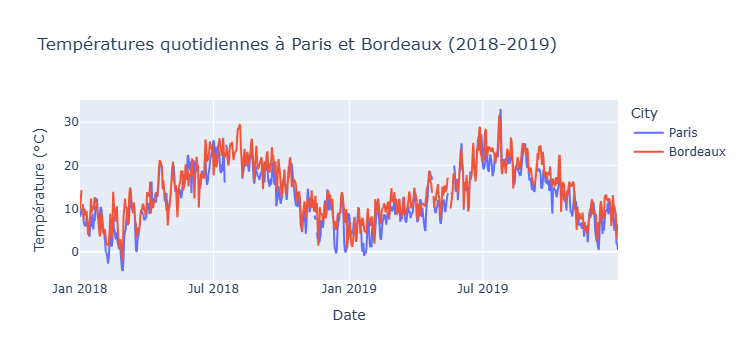

In [34]:
# Importer la bibliothèque Plotly Express pour la visualisation interactive
import plotly.express as px

# Exemple avec Paris et Bordeaux uniquement, sur une période donnée
# Définir les villes à analyser
villes = ['Paris', 'Bordeaux']

# Créer un masque pour filtrer les données des années 2018-2019
mask = (df_fr['date'] >= '2018-01-01') & (df_fr['date'] <= '2019-12-31')

# Appliquer le masque et filtrer pour ne garder que les villes sélectionnées
df_sample = df_fr[(df_fr['City'].isin(villes)) & mask]

# Créer un graphique linéaire interactif avec Plotly
fig = px.line(df_sample, x='date', y='AvgTemperature_C', color='City',
              title='Températures quotidiennes à Paris et Bordeaux (2018-2019)')

# Mettre à jour les titres des axes
fig.update_layout(xaxis_title='Date', yaxis_title='Température (°C)')

# Afficher le graphique interactif
fig.show()

    Visualisation par facettes (facet grid)

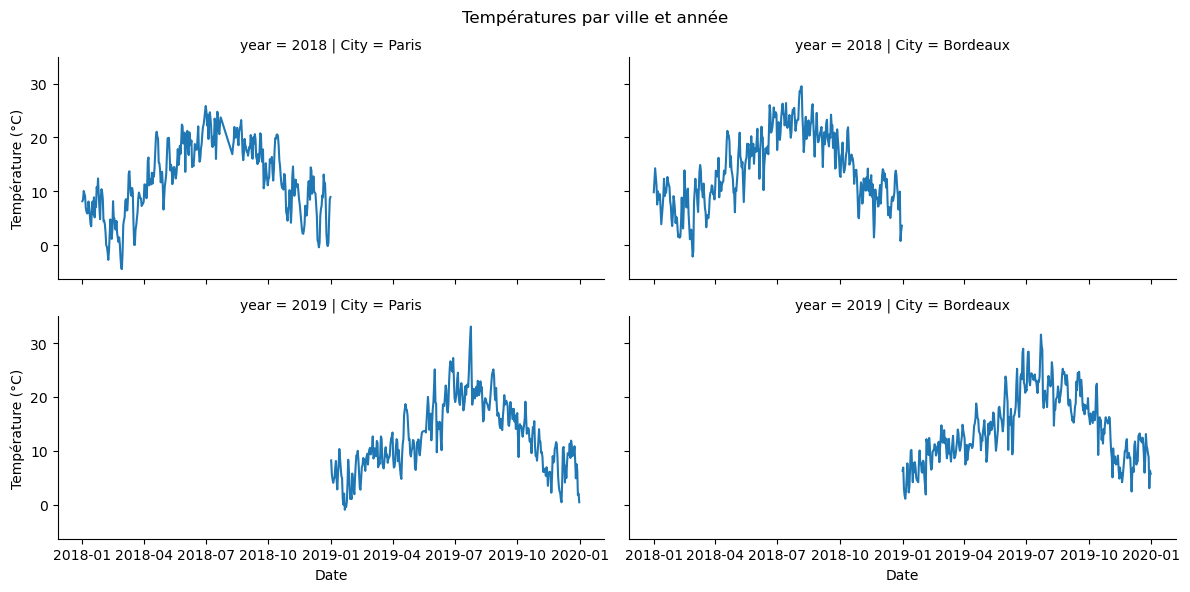

In [43]:
# Importer les bibliothèques nécessaires pour la visualisation et la manipulation des données
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la colonne date en type datetime pour faciliter les manipulations temporelles
df_fr['date'] = pd.to_datetime(df_fr['date'])  # Conversion en datetime si ce n'est pas déjà fait

# Ajouter une colonne année extraite de la date pour faciliter le filtrage
df_fr['year'] = df_fr['date'].dt.year

# Sélectionner quelques villes et années spécifiques pour l'analyse
villes = ['Paris', 'Bordeaux']
df_facet = df_fr[df_fr['City'].isin(villes) & df_fr['year'].isin([2018, 2019])]

# Créer une grille de graphiques avec Seaborn FacetGrid
# Chaque ligne représente une année et chaque colonne une ville
g = sns.FacetGrid(df_facet, col="City", row="year", height=3, aspect=2)

# Appliquer un graphique linéaire à chaque sous-graphique de la grille
g.map(sns.lineplot, "date", "AvgTemperature_C")

# Définir les étiquettes des axes pour tous les sous-graphiques
g.set_axis_labels("Date", "Température (°C)")

# Ajuster l'espacement pour le titre principal
g.fig.subplots_adjust(top=0.9)

# Ajouter un titre principal à l'ensemble de la grille
g.fig.suptitle("Températures par ville et année")

# Afficher la grille de graphiques
plt.show()

    Heatmap mensuelle (moyennes par mois et ville)

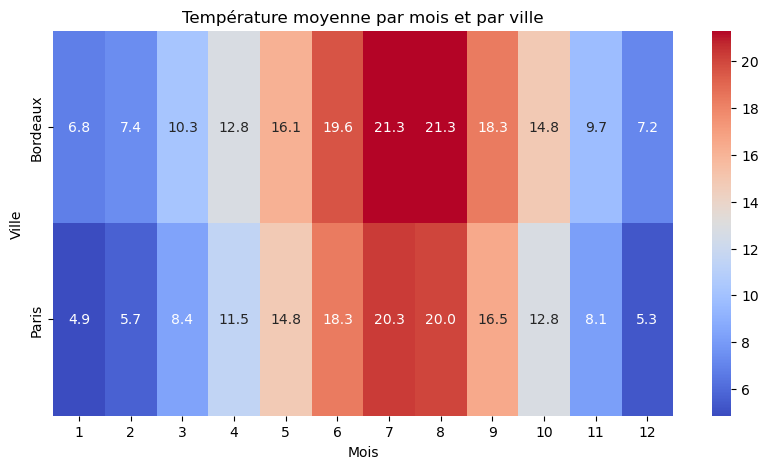

In [40]:
# Créer une copie du dataframe pour éviter de modifier l'original
pivot = df_fr.copy()

# Extraire le mois et l'année de la colonne date pour l'analyse temporelle
pivot['month'] = pivot['date'].dt.month
pivot['year'] = pivot['date'].dt.year

# Calculer la température moyenne par ville, année et mois
# Regrouper les données et réinitialiser l'index pour obtenir un dataframe plat
table = pivot.groupby(['City', 'year', 'month'])['AvgTemperature_C'].mean().reset_index()

# Créer un tableau croisé dynamique avec les villes en lignes et les mois en colonnes
heatmap_data = table.pivot_table(index='City', columns='month', values='AvgTemperature_C')

# Créer une figure avec une taille spécifiée
plt.figure(figsize=(10,5))

# Générer une carte thermique (heatmap) avec les annotations des valeurs
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm")

# Ajouter un titre et des étiquettes aux axes
plt.title("Température moyenne par mois et par ville")
plt.xlabel("Mois")
plt.ylabel("Ville")

# Afficher la carte thermique
plt.show()

    Annotation de points remarquables

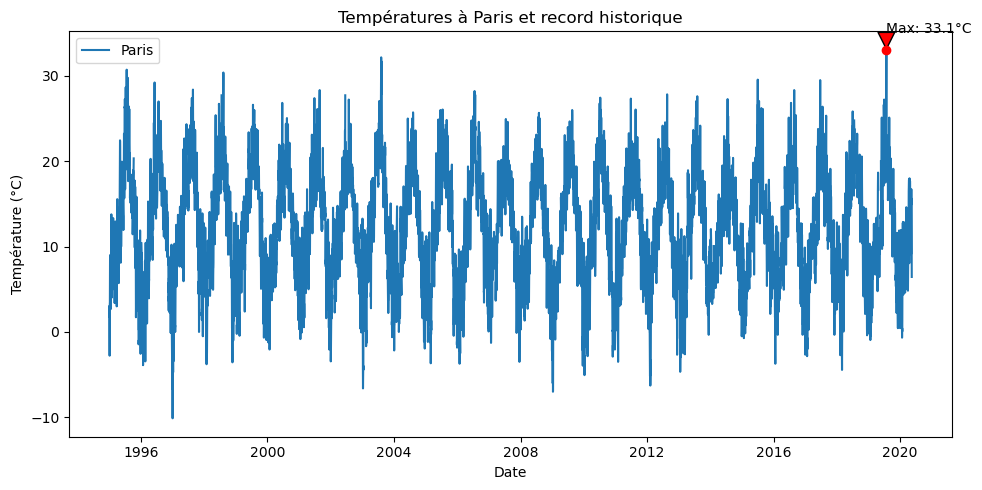

In [41]:
# Exemple : annoter le maximum de température à Paris
# Filtrer les données pour ne garder que celles de Paris
data_paris = df_fr[df_fr['City'] == 'Paris']

# Trouver l'index de la température maximale
idx_max = data_paris['AvgTemperature_C'].idxmax()

# Récupérer la date et la valeur de cette température maximale
max_date = data_paris.loc[idx_max, 'date']
max_temp = data_paris.loc[idx_max, 'AvgTemperature_C']

# Créer une figure avec une taille spécifiée
plt.figure(figsize=(10,5))

# Tracer l'évolution de la température à Paris
plt.plot(data_paris['date'], data_paris['AvgTemperature_C'], label='Paris')

# Ajouter un point rouge pour marquer la température maximale
plt.scatter([max_date], [max_temp], color='red', zorder=5)

# Annoter ce point avec la valeur de température
plt.annotate(f"Max: {max_temp:.1f}°C", (max_date, max_temp),
             xytext=(max_date, max_temp+2), arrowprops=dict(facecolor='red', shrink=0.05))

# Ajouter un titre et des étiquettes aux axes
plt.title("Températures à Paris et record historique")
plt.xlabel("Date")
plt.ylabel("Température (°C)")

# Ajouter une légende
plt.legend()

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

**🚀 Modélisation : Prédire la température quotidienne**

**1️⃣ Vérifier la présence de NaN**

In [56]:
print(df_fr.isnull().sum())

Region               0
Country              0
City                 0
Month                0
Day                  0
Year                 0
date                 0
AvgTemperature      82
AvgTemperature_C    82
year                 0
day_of_year          0
dtype: int64


**2️⃣Nettoyer ou imputer les valeurs manquantes**

In [57]:
df_model = df_fr.dropna(subset=['AvgTemperature_C', 'AvgTemperature'])  

**3️⃣ Pipeline adapté**

RMSE : 6.33
R2 score : 0.03


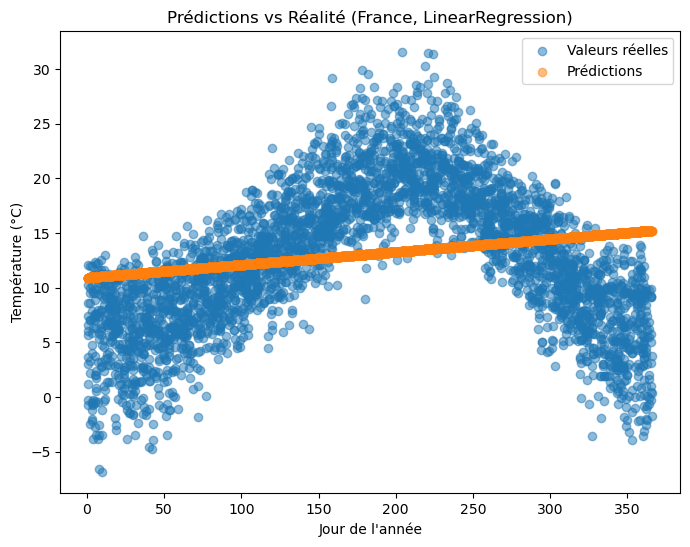

In [58]:
df_fr['day_of_year'] = df_fr['date'].dt.dayofyear

# On retire les lignes avec NaN pour la modélisation
df_model = df_fr.dropna(subset=['AvgTemperature_C', 'day_of_year'])

X = df_model[['day_of_year']]
y = df_model['AvgTemperature_C']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"RMSE : {rmse:.2f}")
print(f"R2 score : {r2:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, label="Valeurs réelles", alpha=0.5)
plt.scatter(X_test, y_pred, label="Prédictions", alpha=0.5)
plt.xlabel("Jour de l'année")
plt.ylabel("Température (°C)")
plt.title("Prédictions vs Réalité (France, LinearRegression)")
plt.legend()
plt.show()

**💡 Améliorations faciles pour la modélisation**

**1. Ajouter des features trigonométriques**

RMSE : 3.50
R2 score : 0.70


C:\Users\josue\AppData\Local\Temp\ipykernel_25492\476994778.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\josue\AppData\Local\Temp\ipykernel_25492\476994778.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



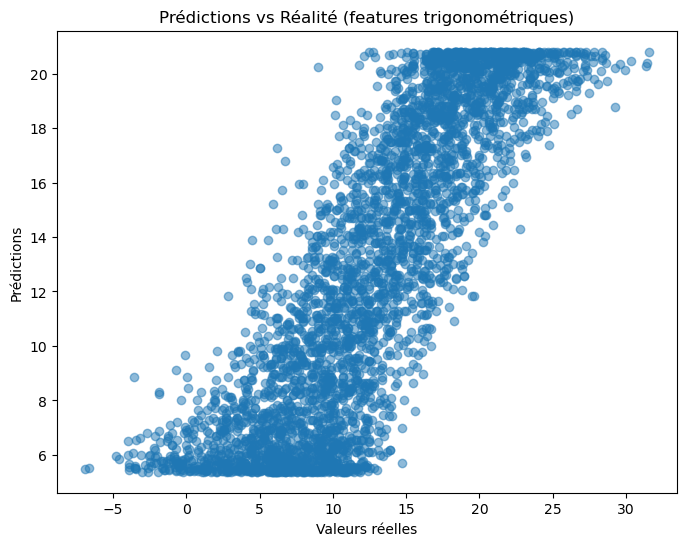

In [62]:
import numpy as np

df_model['sin_doy'] = np.sin(2 * np.pi * df_model['day_of_year'] / 365)
df_model['cos_doy'] = np.cos(2 * np.pi * df_model['day_of_year'] / 365)

X = df_model[['sin_doy', 'cos_doy']]
y = df_model['AvgTemperature_C']

# Split & fit (idem que précédemment)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"RMSE : {rmse:.2f}")
print(f"R2 score : {r2:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Réalité (features trigonométriques)")
plt.show()

**🚀 Pipeline XGBoost sur tes données météo**

**2️⃣ Préparation des données**

In [64]:
import xgboost as xgb

# Si ce n'est pas déjà fait
import numpy as np
df_model['sin_doy'] = np.sin(2 * np.pi * df_model['day_of_year'] / 365)
df_model['cos_doy'] = np.cos(2 * np.pi * df_model['day_of_year'] / 365)

X = pd.concat([
    df_model[['sin_doy', 'cos_doy']],
    pd.get_dummies(df_model['City'])
], axis=1)
y = df_model['AvgTemperature_C']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

C:\Users\josue\AppData\Local\Temp\ipykernel_25492\3685837962.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\josue\AppData\Local\Temp\ipykernel_25492\3685837962.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**3️⃣ Entraînement XGBoost**

In [65]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

**4️⃣ Prédiction et évaluation**

In [66]:
y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost RMSE : {rmse_xgb:.2f}")
print(f"XGBoost R2 score : {r2_xgb:.2f}")

XGBoost RMSE : 3.41
XGBoost R2 score : 0.72


**5️⃣ Visualisation des performances**

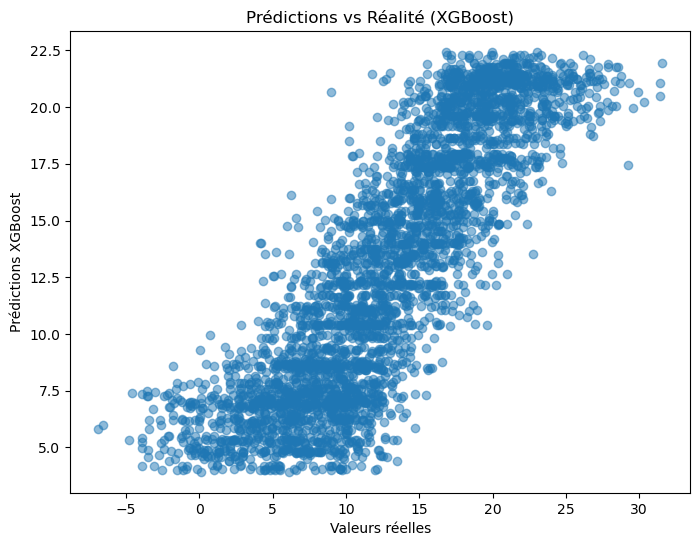

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions XGBoost")
plt.title("Prédictions vs Réalité (XGBoost)")
plt.show()